In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score




In [49]:
data = pd.read_csv('/Copy of Rotten_Tomatoes_Movies 2.csv')
data.head()


,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",12-02-2010,29-06-2010,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",30-04-2010,19-10-2010,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",05-10-1979,27-08-1997,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",13-04-1957,06-03-2001,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",01-01-1954,20-05-2003,127.0,Disney,Fresh,89,27,74.0


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
plt.style.use('ggplot')
sns.set_palette('viridis')

In [27]:
data = pd.read_csv('/Copy of Rotten_Tomatoes_Movies 2.csv')

In [28]:
print("First 5 rows of the dataset:")
display(data.head())


First 5 rows of the dataset:


,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",12-02-2010,29-06-2010,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",30-04-2010,19-10-2010,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",05-10-1979,27-08-1997,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",13-04-1957,06-03-2001,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",01-01-1954,20-05-2003,127.0,Disney,Fresh,89,27,74.0


In [29]:
print("\nDataset Information:")
data.info()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-n

In [30]:
print("\nBasic Statistical Summary:")
display(data.describe())



Basic Statistical Summary:


,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,16483.000000,16638.000000,16638.000000,16386.000000
mean,102.391494,60.466522,56.607104,60.470829
std,25.028011,28.587230,66.383800,20.462368
min,1.000000,0.000000,5.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000
50%,99.000000,66.000000,28.000000,62.000000
75%,111.000000,86.000000,76.000000,77.000000
max,2000.000000,100.000000,497.000000,100.000000


In [31]:
print("\nMissing Values in Dataset:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])



Missing Values in Dataset:
movie_info              24
critics_consensus     8329
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
audience_rating        252
dtype: int64


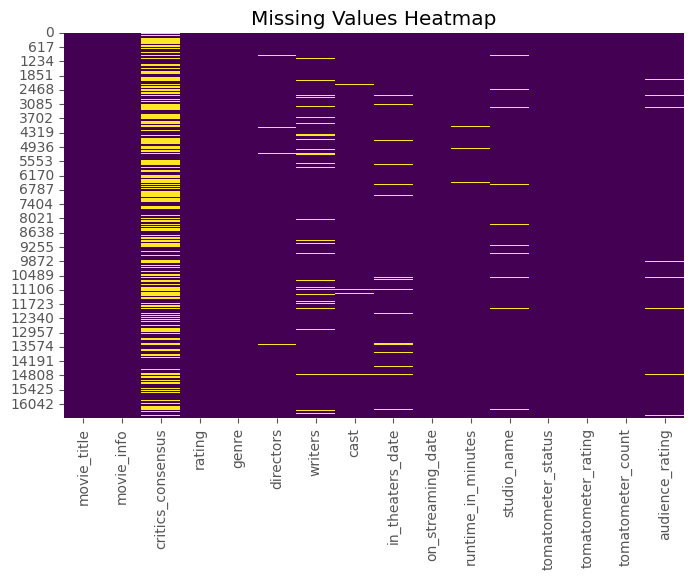

In [32]:
plt.figure(figsize=(8, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [36]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns



Numeric Features Distribution:


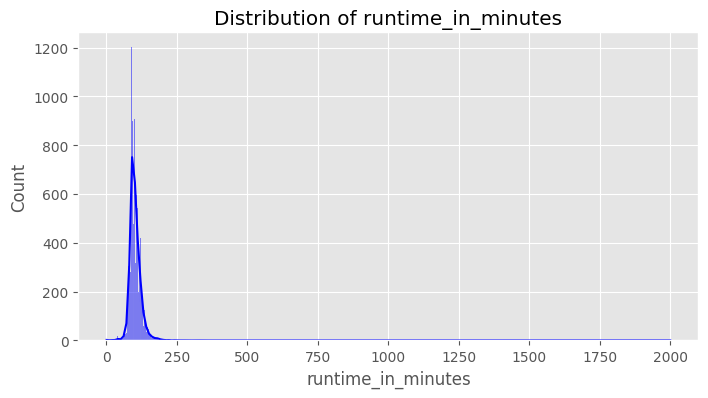

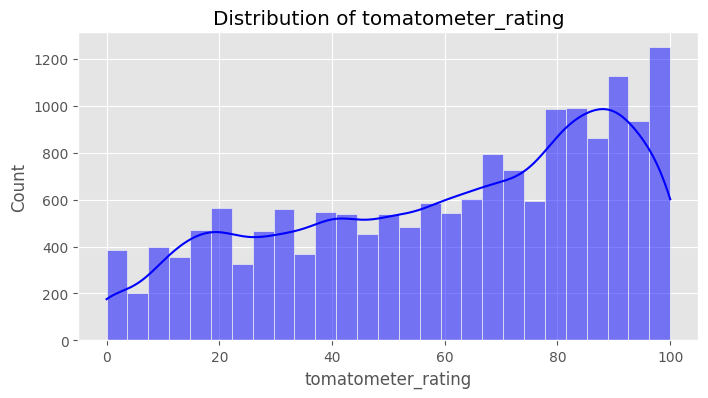

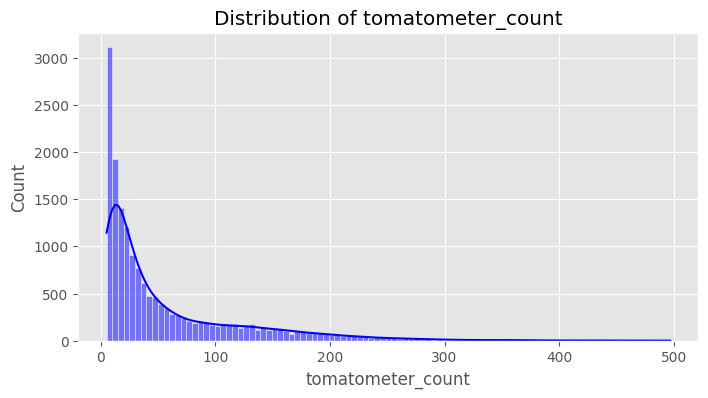

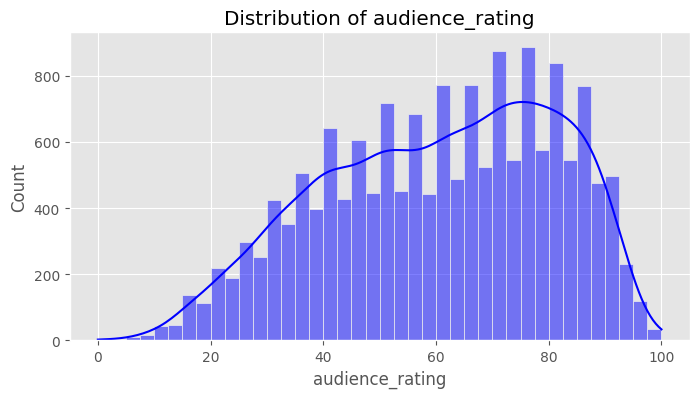

In [37]:
print("\nNumeric Features Distribution:")
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

print("\nCategorical Features Distribution:")
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=data, palette='plasma')
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


Categorical Features Distribution:


<ipython-input-38-a5fc5edc5c13>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='plasma')


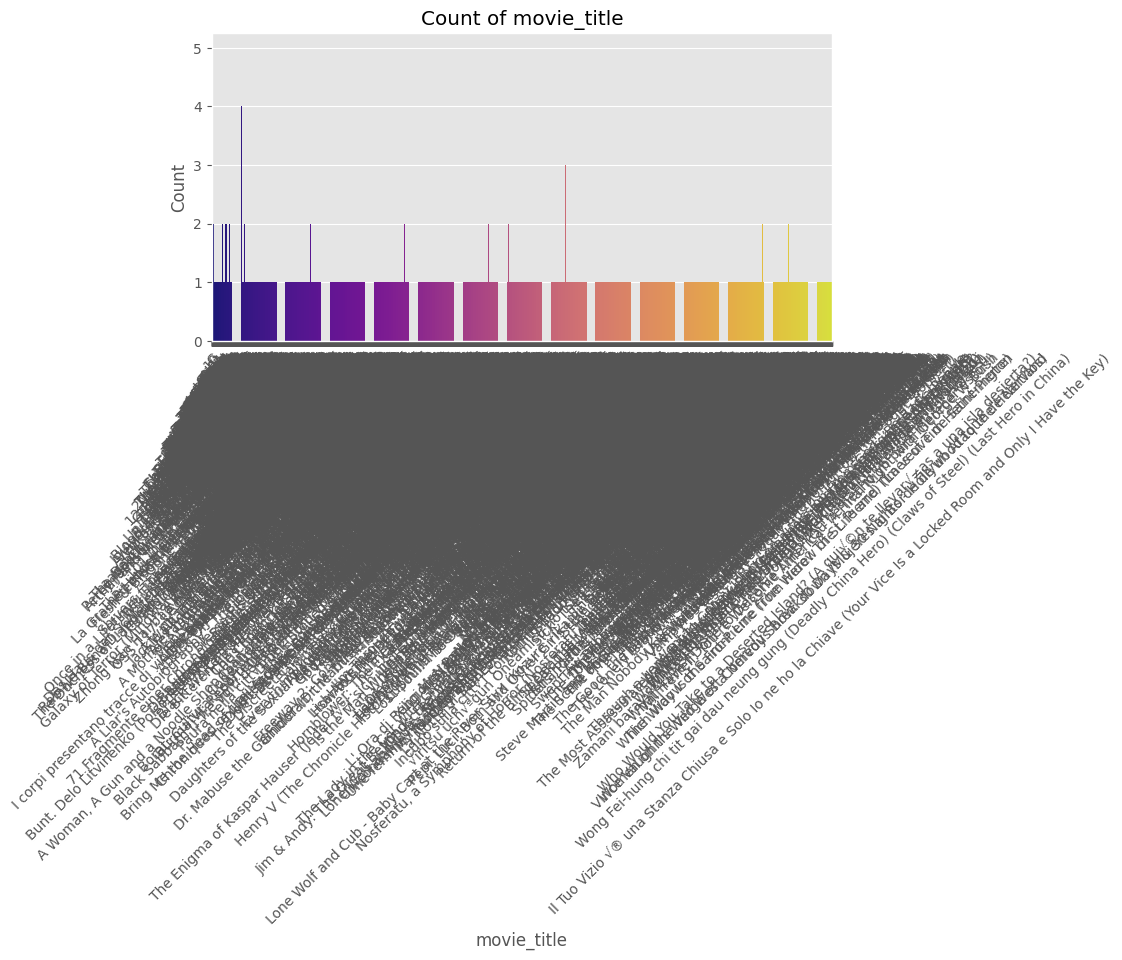

<ipython-input-38-a5fc5edc5c13>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='plasma')


ValueError: 
Americans spend $62 billion each year on lottery tickets, and every time someone buys one they likely imagine what their life would be like if they suddenly won a multi-million dollar prize. But the dream and the reality are often very different, and filmmaker Jeffrey Blitz offers a look into the lives of several folks who won big with unexpected results in this documentary. In Lucky, we meet Quang and Mai Dao, a couple from Vietnam who won over $22 million after settling in Nebraska, and have struggled to hold onto the values and work ethic that first brought them to the United States. Kristine and Steven White won a $110 million prize in the Pennsylvania lottery and found it seriously impacted their friendships and their identity, while they were also inundated with letters from strangers asking for a share of the money. William "Buddy" Post III won $16 million, but lost most of it through poor money management and was nearly killed by his own brother over a financial dispute. Robert Uomini still teaches math in California after winning $22 million though he can now indulge his passion for sports cars, and James Gatzke, who was near the end of his rope, got a second chance at life when an Illinois lottery ticket paid off to the tune of $5 and a half million. Lucky was an official selection at the 2010 Sundance Film Festival.
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  ^
ParseException: Expected end of text, found '$'  (at char 626), (line:1, col:627)

<Figure size 800x400 with 1 Axes>

<ipython-input-38-a5fc5edc5c13>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='plasma')


KeyboardInterrupt: 

In [38]:
print("\nCategorical Features Distribution:")
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=data, palette='plasma')
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [39]:
print("\nCorrelation Matrix:")
correlation_matrix = data[numeric_columns].corr()
display(correlation_matrix)



Correlation Matrix:


,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
runtime_in_minutes,1.000000,0.071270,0.191975,0.168507
tomatometer_rating,0.071270,1.000000,0.079565,0.660111
tomatometer_count,0.191975,0.079565,1.000000,0.141012
audience_rating,0.168507,0.660111,0.141012,1.000000


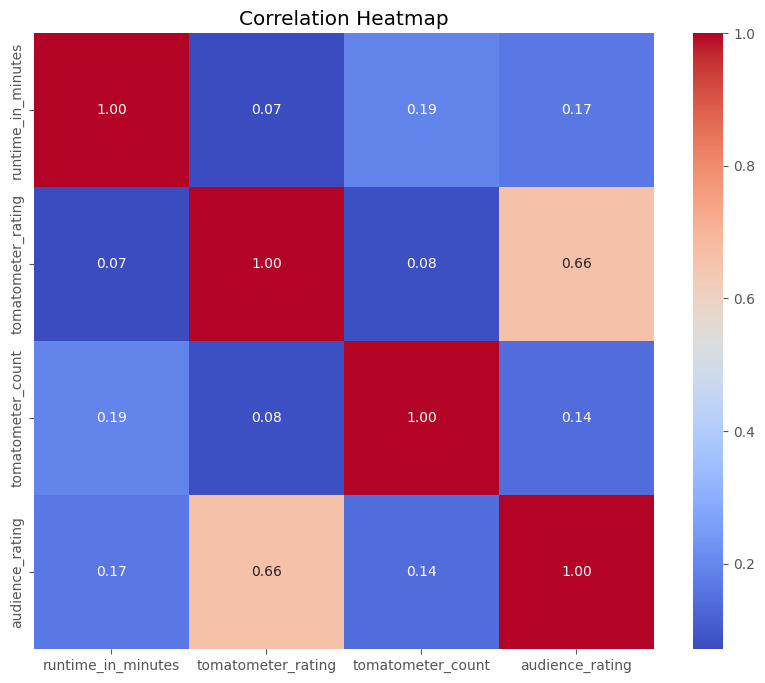

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



Pairplot of Numeric Features:


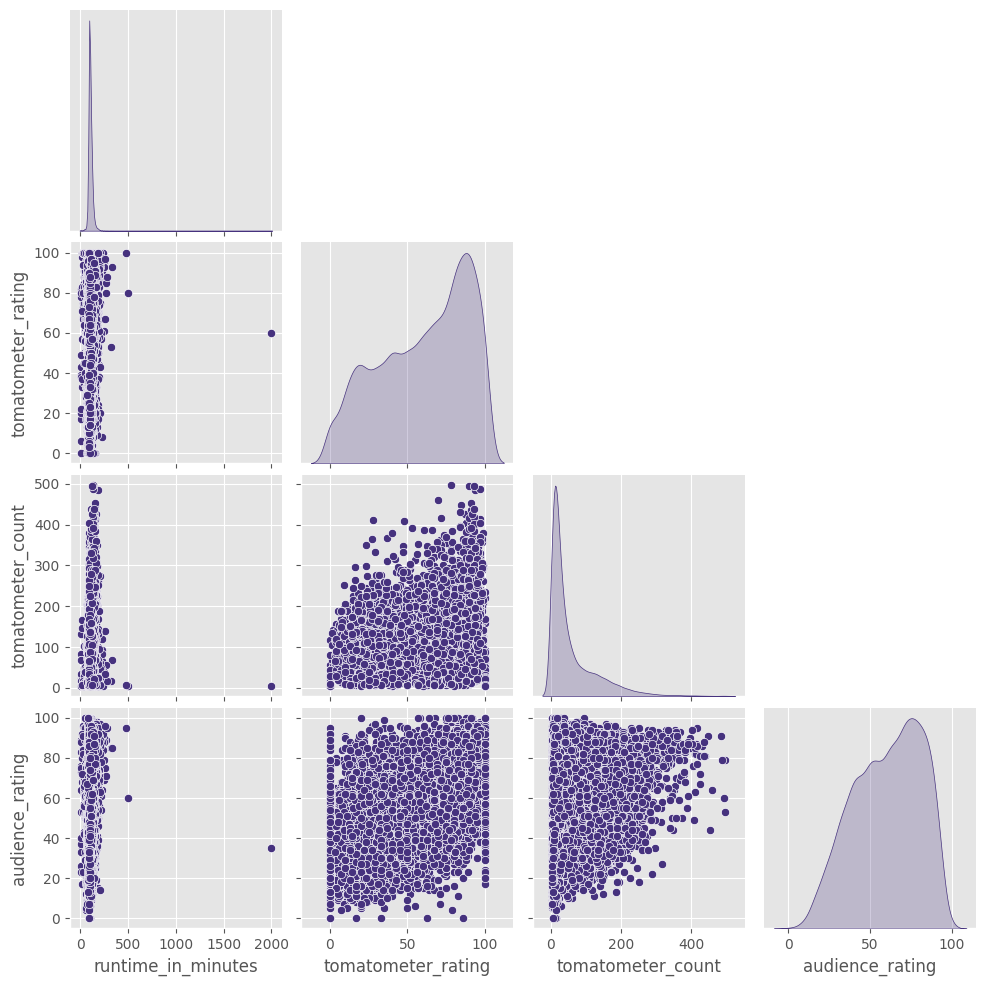

In [41]:
# Pairplot for numeric features (first 5 for better visualization)
print("\nPairplot of Numeric Features:")
sns.pairplot(data[numeric_columns[:5]], diag_kind='kde', corner=True)
plt.show()



Outlier Detection Using Boxplots:


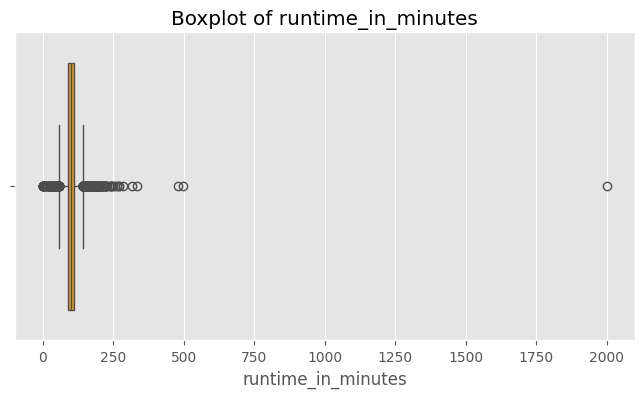

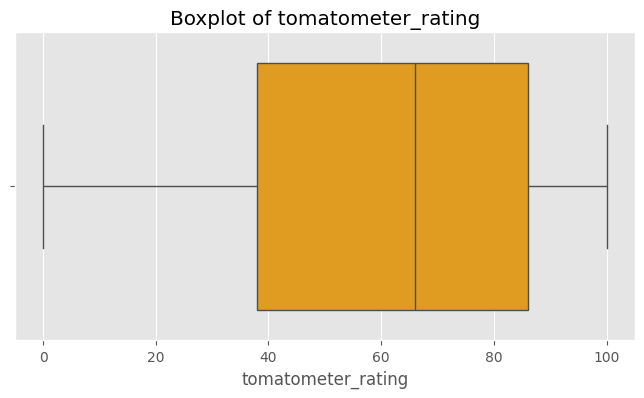

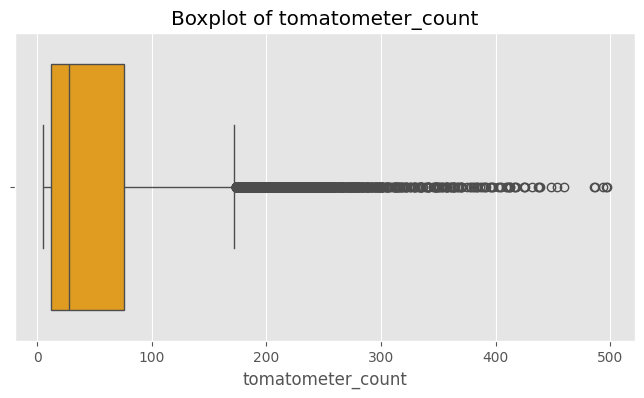

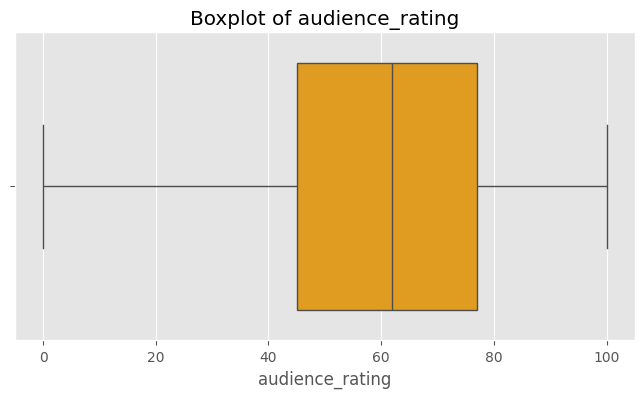

In [42]:
# Boxplots for numeric columns to detect outliers
print("\nOutlier Detection Using Boxplots:")
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col], color='orange')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()



Relationship between Numeric Features and Target:


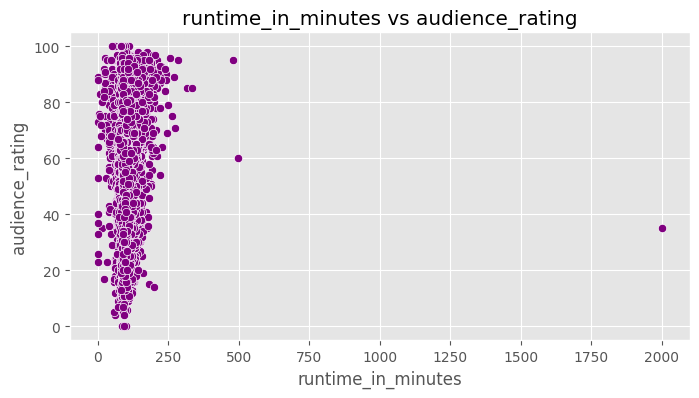

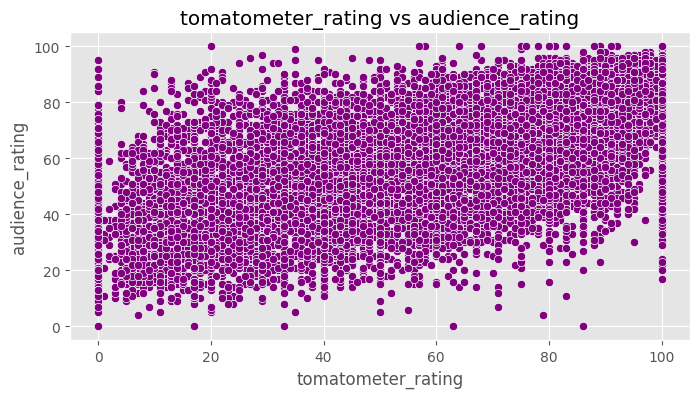

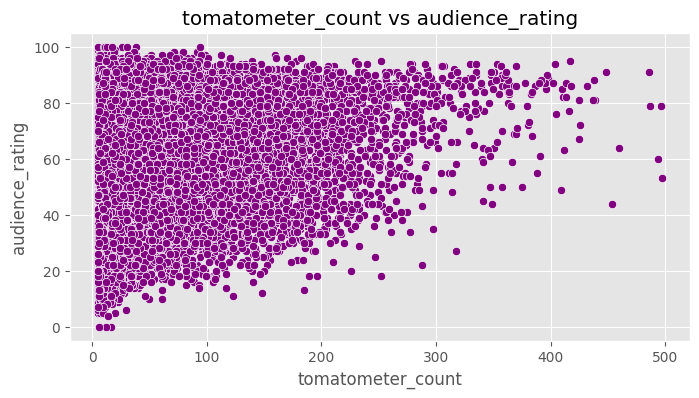

In [43]:
# Numeric features vs Target (assuming target is numeric or categorical)
target = 'audience_rating'

print("\nRelationship between Numeric Features and Target:")
for col in numeric_columns:
    if col != target:
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=data[col], y=data[target], color='purple')
        plt.title(f"{col} vs {target}")
        plt.xlabel(col)
        plt.ylabel(target)
        plt.show()



Relationship between Categorical Features and Target:


<ipython-input-44-8b7a740a9b53>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[target], palette='Set2')


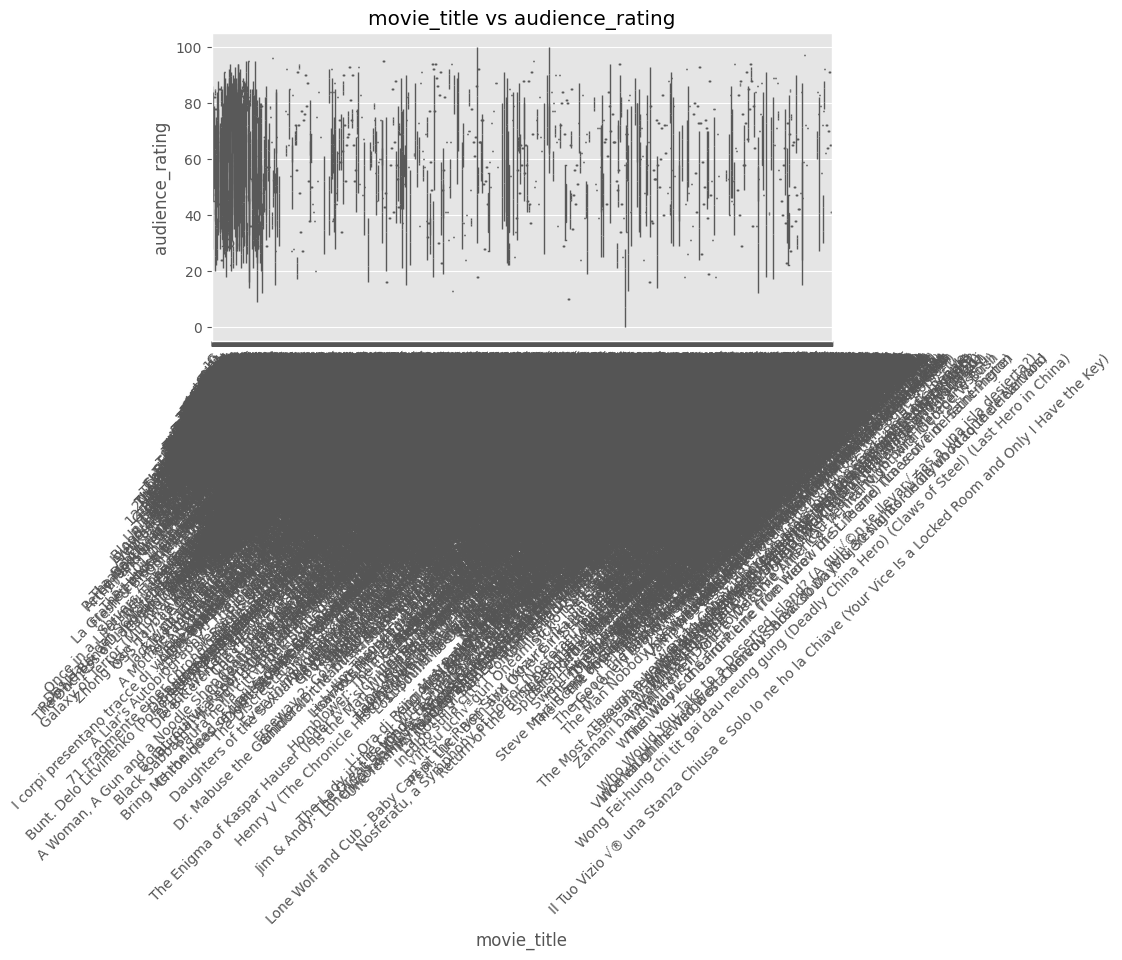

<ipython-input-44-8b7a740a9b53>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[target], palette='Set2')


ValueError: 
Americans spend $62 billion each year on lottery tickets, and every time someone buys one they likely imagine what their life would be like if they suddenly won a multi-million dollar prize. But the dream and the reality are often very different, and filmmaker Jeffrey Blitz offers a look into the lives of several folks who won big with unexpected results in this documentary. In Lucky, we meet Quang and Mai Dao, a couple from Vietnam who won over $22 million after settling in Nebraska, and have struggled to hold onto the values and work ethic that first brought them to the United States. Kristine and Steven White won a $110 million prize in the Pennsylvania lottery and found it seriously impacted their friendships and their identity, while they were also inundated with letters from strangers asking for a share of the money. William "Buddy" Post III won $16 million, but lost most of it through poor money management and was nearly killed by his own brother over a financial dispute. Robert Uomini still teaches math in California after winning $22 million though he can now indulge his passion for sports cars, and James Gatzke, who was near the end of his rope, got a second chance at life when an Illinois lottery ticket paid off to the tune of $5 and a half million. Lucky was an official selection at the 2010 Sundance Film Festival.
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  ^
ParseException: Expected end of text, found '$'  (at char 626), (line:1, col:627)

<Figure size 800x400 with 1 Axes>

<ipython-input-44-8b7a740a9b53>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data[target], palette='Set2')


KeyboardInterrupt: 

In [44]:
# Categorical features vs Target
print("\nRelationship between Categorical Features and Target:")
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col], y=data[target], palette='Set2')
    plt.title(f"{col} vs {target}")
    plt.xlabel(col)
    plt.ylabel(target)
    plt.xticks(rotation=45)
    plt.show()


In [50]:
numeric_features = ['feature1', 'feature2']
categorical_features = ['feature3', 'feature4']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'